# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Запустим pandas и откроем массив данных

In [240]:
import pandas as pd
import numpy as np
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Посмотрим общую информауцию и выведем на экран первые 10 строк

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [242]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Всего в массиве 22 столбца и 23699 строк.
Для начала проверим на дубликаты.
В 14 столбцах есть пропуски, необходимо их изучить. 
Столбцы last_price, floors_total, blacony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, так как им нет необходимости быть с плавающей точкой, переведем в int64 для удобства.
Стобец first_day_exposition обработаем для более привычного отображения даты.


### Шаг 2. Предобработка данных

Проверим массив на дубликаты.

In [243]:
df.duplicated().sum()

0

Прекрасно, дублирующихся строк нет.

Займемся пропущенными значениями.

Столбец locality_name.

In [244]:
df['locality_name'].isna().sum()

49

49 пропусков. Посмотрим на значения.

In [245]:
df['locality_name'].value_counts()

Санкт-Петербург       15721
посёлок Мурино          522
посёлок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
поселок Рабитицы          1
поселок Коммунары         1
деревня Тойворово         1
посёлок Коробицыно        1
поселок Гладкое           1
Name: locality_name, Length: 364, dtype: int64

In [246]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [247]:
df.query('locality_name == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Что-то общее для этих данных не отследить, вероятно присутствует человеческий фактор.
Заполнить можно толко параметром "Другой", ведь даже если найти схожий по расстоянию от центра или
аэропорта населенный пункт, не факт что мы угадаем - радиус может быть в другом направлении. И 49
пропусков это не настолько большой показатель.

In [248]:
df['locality_name'] = df['locality_name'].fillna('Другой')

Проверим.

In [249]:
df.query('locality_name == "Другой"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,Другой,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,...,18.60,0.0,Другой,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,...,10.70,0.0,Другой,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,...,8.20,0.0,Другой,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,...,6.50,0.0,Другой,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,Другой,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,Другой,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,...,NaN,0.0,Другой,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,8.30,4.0,Другой,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,...,NaN,0.0,Другой,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [250]:
df['locality_name'].isna().sum()

0

Теперь необходимо проверить на совпадения в названиях, провести категоризацию.
Посмотрим на количество уникальных значений.

In [251]:
df['locality_name'].nunique()

365

365 значений. Напишем функцию для категоризации.

In [252]:
def loc_name(row):
    for index, letter in enumerate(row['locality_name']):
        if letter.isupper():
            row.locality_name = row.locality_name[index:]
            break
    return row

Применим ее.

In [253]:
df = df.apply(loc_name, axis=1)

Проверим себя.

In [254]:
df['locality_name'].nunique()

306

306 значений. Значит было что устранять и оно теперь устранено.

Этажи. 
Посмотрим на количество пропусков.

In [255]:
df['floors_total'].isna().sum()

86

86 пропусков. Немного для этого массива. Возможно при заполнении оператор ошибся. Логично было бы заменить их средними значениями этажности по месту нахождения квартиры.
Посмотрим на средние значения по населенным пунктам.

In [256]:
local_to_floor = df.pivot_table(index='locality_name',values='floors_total', aggfunc = 'mean').round()

Введем переменную для функции.

In [257]:
fill_floor = local_to_floor['floors_total'].to_dict()

Теперь заменим пропуски, приведем значения к единому типу и применим их.

In [258]:
df['floors_total'] = df['floors_total'].fillna(0)
df['floors_total'] = df['floors_total'].astype('int')
local_to_floor = local_to_floor.astype('int')

Напишем функцию, где применим средние значения по населенным пунктам, но поставим условие, где в случае
если показатель этажа квартиры превышает среднюю этажность по населенному пункту, то возвращает в столбец 
floors_total значение столбца floor.

In [259]:
def floor_filler(row):
    if row['floors_total'] == 0:
        if row['floor'] > fill_floor[row['locality_name']]:
            return row['floor']
        else:
            return fill_floor[row['locality_name']]
    return row['floors_total']

Применим функцию.

In [260]:
df['floors_total'] = df.apply(floor_filler, axis=1)

Проверим себя.

In [261]:
df['floors_total'].value_counts()

5.0     5790
9.0     3761
16.0    1376
12.0    1366
4.0     1200
10.0    1175
25.0    1075
6.0      914
17.0     834
3.0      668
7.0      594
14.0     555
18.0     510
24.0     471
8.0      390
2.0      383
15.0     368
23.0     353
19.0     342
22.0     287
20.0     277
11.0     249
13.0     232
27.0     164
21.0     162
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Нулей нет. Приступаем к следующему.

Обработаем данные в столбце first_day_exposition для большей наглядности и удобства дальнейшей работы.

In [263]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S')

Проверим себя.

In [264]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Посчитаем пропуски.

In [266]:
df['living_area'].isna().sum()

1903

1903 пропуска. Существенный пробел. Можно попробовать подставить в пропуски соотношение от общей площади. 
И по аналогии сразу заполнить kitchen_area. Но в kitchen_area также есть пропуски.
Сначала заполним пропуски нулями.

In [267]:
df['living_area'] = df['living_area'].fillna(0)
df['kitchen_area'] = df['kitchen_area'].fillna(0)

Cуществует определенная пропорция в соотношении общей площади и жилой площади, а также общей площади и кухни. Необходимо найти эти соотношения и на их основании заполнить недостающие значения.

In [268]:
total_mean = df['total_area'].mean()
print(total_mean)

60.348650997932225


In [269]:
living_mean = df['living_area'].mean()
print(living_mean)

31.69093006084619


In [270]:
kitchen_mean = df['kitchen_area'].mean()
print(kitchen_mean)

9.553814084982521


In [271]:
total_and_living = total_mean / living_mean 
print(total_and_living)

1.9042877846141963


In [272]:
total_and_kitchen = total_mean / kitchen_mean
print(total_and_kitchen)

6.316707700309267


Теперь, зная соотношения общей площади и жилой площади, а также жилой площади и кухни, мы можем применить их к столбцу total_area и получить недостающие значения.
Напишем для этого две функции, по одной на столбцы living_area и kitchen_area.

In [273]:
def living_area_filler(row):
    if row['living_area'] == 0:
        return row['total_area'] / total_and_living
    return row['living_area']

df['living_area'] = df.apply(living_area_filler, axis=1)

In [274]:
def kitchen_area_filler(row):
    if row['kitchen_area'] == 0:
        return row['total_area'] / total_and_kitchen
    return row['kitchen_area']

df['kitchen_area'] = df.apply(kitchen_area_filler, axis=1)

In [275]:
df['living_area'].unique()

array([51.        , 18.6       , 34.3       , ..., 42.55      ,
       42.16799617, 40.30378214])

In [276]:
df.query('living_area == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [277]:
df.query('kitchen_area == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Проанализируем столбец ceiling_height.
Посмотрим на количество пропусков.

In [278]:
df['ceiling_height'].isna().sum()

9195

9195 пропусков. Более трети от общей массы. Попробуем заменить пропущенные значения на медианные
значения высоты потолков по населенным пунктам - возможно будут нули в населенных пунктах c 
объектами без указания высоты потолка.

In [279]:
mean_ceiling = df.groupby('locality_name')['ceiling_height'].median().to_dict()

Теперь заменим пропуски на 0.

In [280]:
df['ceiling_height'] = df['ceiling_height'].fillna(0)

Напишем функцию, где применим медианное значение.

In [281]:
def ceiling_filler(row):
    if row['ceiling_height'] == 0:
        return mean_ceiling[row['locality_name']]
    return row['ceiling_height']

Применим функцию.

In [282]:
df['ceiling_height'] = df.apply(ceiling_filler, axis=1)

Проверим себя.

In [283]:
df['ceiling_height'].value_counts()

2.70     7838
2.50     4161
2.60     2125
2.55     1613
2.75     1215
         ... 
4.80        1
10.30       1
27.50       1
22.60       1
4.30        1
Name: ceiling_height, Length: 193, dtype: int64

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23604 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [285]:
df['ceiling_height'].isna().sum()

95

121 пропуск - для нашей выборки допустимая погрешность.

Рассмотрим столбец days_exposition.

In [286]:
df['days_exposition'].isna().sum()

3181

3181 пропуск. Вероятно это означает, что квартира еще не продана, ведь объявление все еще размещено.
Заполним пропуски нулями, но будем иметь эти значения в виду при дальнейшей аналитике.

In [287]:
df['days_exposition'] = df['days_exposition'].fillna(0)

Проверим.

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23604 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Столбец balcony.

In [289]:
df['balcony'].isna().sum()

11519

11519 пропусков. Рассмотрим.

In [290]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [291]:
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

4 и 5 балконов выглядят необычно, но квартиры бывают разные. А вот пропуски скорее всего подразумевают, что в квартире балкон отсутствует. Заменим пропуски нулями.

In [292]:
df['balcony'] = df['balcony'].fillna(0)

Проверим

In [293]:
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [294]:
df['balcony'].isna().sum()

0

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23604 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Теперь столбец is_apartment. 

In [296]:
df['is_apartment'].isna().sum()

20924

20924 пропуска. Рассмотрим подробнее.

In [297]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Всего три значения - да, нет, неизвестно. Вероятно оператор при заполнении информации по обычной квартире не посчитал нужным внести информацию о том что это не апартаменты. Заполним все пропуски значениями False.

In [298]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Проверим

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23604 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [300]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

50 апартаментов - достаточно правдиво, ведь покупка апартаментов это в первую очередь инструмент долгосрочных
инвестиций и логично что их предложение ограничено.

airports_nearest

In [301]:
df['airports_nearest'].isna().sum()

5542

5542, многовато. Можем заменить данными согласно населенным пунктам. 
Для этого необходимо посчитать медиану для каждого населенного пункта и подставить в пропущенные строчки
временное значение.

In [302]:
airport_where = df.groupby('locality_name')['airports_nearest'].median()
df['airports_nearest'] = df['airports_nearest'].fillna(0)

Создадим функцию для замены. 

In [303]:
def airport_filler(row):
    if row['airports_nearest'] == 0:
        return airport_where[row['locality_name']]
    return row['airports_nearest']

Применим ее. 

In [304]:
df['airports_nearest'] = df.apply(airport_filler, axis=1)

In [305]:
df['airports_nearest'].isna().sum()

4829

5386 пропусков. Видимо, не для каждого населенного пункта получилось найти медианное расстояние.
Заполним нулями и запомним этот факт.

In [306]:
df['airports_nearest'] = df['airports_nearest'].fillna(0)

In [307]:
df['airports_nearest'].isna().sum()

0

cityCenters_nearest

In [308]:
df['cityCenters_nearest'].isna().sum()

5519

5519 пропусков. Предположим что этот столбец актуален только для Санкт-Петербурга.

In [309]:
df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,8.30000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,83.495783,9,False,...,25.17134,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.00000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,37.599359,22,False,...,18.90000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300000,4,False,...,9.10000,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19,2,2.70,5.0,31.000000,2,False,...,6.00000,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,10.60000,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,13.83000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0


15660 совпадений.

In [310]:
df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27,1,2.7,10.0,35.708888,6,False,...,10.765102,0.0,Санкт-Петербург,26757.5,NaN,NaN,NaN,NaN,NaN,0.0
593,20,4200000.0,38.30,2019-04-16,1,2.6,16.0,19.800000,10,False,...,10.100000,2.0,Санкт-Петербург,26757.5,NaN,NaN,NaN,NaN,NaN,0.0
604,11,9899000.0,101.00,2018-12-12,3,3.0,5.0,62.000000,3,False,...,15.000000,0.0,Санкт-Петербург,26757.5,NaN,NaN,NaN,NaN,NaN,0.0
742,7,37000000.0,161.00,2016-05-22,3,2.7,9.0,84.000000,8,False,...,25.487961,0.0,Санкт-Петербург,26757.5,NaN,NaN,NaN,NaN,NaN,402.0
795,19,7100000.0,59.60,2019-02-13,2,3.4,5.0,36.600000,2,False,...,12.500000,0.0,Санкт-Петербург,26757.5,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21668,9,4500000.0,34.30,2019-03-04,1,2.7,9.0,17.500000,3,False,...,8.900000,1.0,Санкт-Петербург,26757.5,NaN,NaN,NaN,NaN,NaN,0.0
21881,15,44500000.0,169.00,2019-02-28,3,3.3,9.0,101.000000,7,False,...,18.000000,4.0,Санкт-Петербург,26757.5,NaN,NaN,NaN,NaN,NaN,0.0
21955,19,130000000.0,431.00,2017-10-02,7,3.7,8.0,220.000000,5,False,...,20.000000,5.0,Санкт-Петербург,26757.5,NaN,NaN,NaN,NaN,NaN,161.0
22554,5,3415000.0,31.65,2019-04-16,1,2.7,24.0,16.620387,14,False,...,8.700000,2.0,Санкт-Петербург,26757.5,NaN,NaN,NaN,NaN,NaN,0.0


61 исключение.

In [311]:
df.query('locality_name != "Санкт-Петербург" and cityCenters_nearest == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,9.100000,0.0,Янино-1,0.0,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,...,8.810000,0.0,Мурино,51553.0,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,2.60,5.0,30.000000,5,False,...,9.000000,0.0,Сертолово,0.0,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25.0,30.000000,15,False,...,11.000000,2.0,Кудрово,0.0,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,2.56,9.0,17.224287,2,False,...,5.192578,0.0,Коммунар,0.0,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5.0,45.500000,3,False,...,5.500000,0.0,Дзержинского,0.0,NaN,NaN,NaN,NaN,NaN,0.0
23692,2,1350000.0,30.00,2017-07-07,1,2.60,5.0,17.500000,4,False,...,6.000000,0.0,Тихвин,0.0,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,0.0,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700000,1,False,...,8.976195,0.0,Рождествено,0.0,NaN,NaN,NaN,NaN,NaN,0.0


5458 подтверждений.
Получается что мы можем спокойно заполнить эти пропуски нулями и учитывать это впоследствии.

In [312]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)

In [313]:
df['cityCenters_nearest'].isna().sum()

0

parks_around3000
Проверим здесь гипотезу cityCenters_nearest.

In [314]:
df['parks_around3000'].isna().sum()

5518

5518 пропусков - почти такое же значение.

In [315]:
df.query('locality_name == "Санкт-Петербург" and parks_around3000 != "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,8.30000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,83.495783,9,False,...,25.17134,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.00000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,37.599359,22,False,...,18.90000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300000,4,False,...,9.10000,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19,2,2.70,5.0,31.000000,2,False,...,6.00000,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,10.60000,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,13.83000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0


15660 совпадений. Снова!

In [316]:
df.query('locality_name == "Санкт-Петербург" and parks_around3000 == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27,1,2.7,10.0,35.708888,6,False,...,10.765102,0.0,Санкт-Петербург,26757.5,0.0,NaN,NaN,NaN,NaN,0.0
593,20,4200000.0,38.30,2019-04-16,1,2.6,16.0,19.800000,10,False,...,10.100000,2.0,Санкт-Петербург,26757.5,0.0,NaN,NaN,NaN,NaN,0.0
604,11,9899000.0,101.00,2018-12-12,3,3.0,5.0,62.000000,3,False,...,15.000000,0.0,Санкт-Петербург,26757.5,0.0,NaN,NaN,NaN,NaN,0.0
742,7,37000000.0,161.00,2016-05-22,3,2.7,9.0,84.000000,8,False,...,25.487961,0.0,Санкт-Петербург,26757.5,0.0,NaN,NaN,NaN,NaN,402.0
795,19,7100000.0,59.60,2019-02-13,2,3.4,5.0,36.600000,2,False,...,12.500000,0.0,Санкт-Петербург,26757.5,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21668,9,4500000.0,34.30,2019-03-04,1,2.7,9.0,17.500000,3,False,...,8.900000,1.0,Санкт-Петербург,26757.5,0.0,NaN,NaN,NaN,NaN,0.0
21881,15,44500000.0,169.00,2019-02-28,3,3.3,9.0,101.000000,7,False,...,18.000000,4.0,Санкт-Петербург,26757.5,0.0,NaN,NaN,NaN,NaN,0.0
21955,19,130000000.0,431.00,2017-10-02,7,3.7,8.0,220.000000,5,False,...,20.000000,5.0,Санкт-Петербург,26757.5,0.0,NaN,NaN,NaN,NaN,161.0
22554,5,3415000.0,31.65,2019-04-16,1,2.7,24.0,16.620387,14,False,...,8.700000,2.0,Санкт-Петербург,26757.5,0.0,NaN,NaN,NaN,NaN,0.0


61 исключение. Снова!

In [317]:
df.query('locality_name != "Санкт-Петербург" and parks_around3000 == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,9.100000,0.0,Янино-1,0.0,0.0,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,...,8.810000,0.0,Мурино,51553.0,0.0,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,2.60,5.0,30.000000,5,False,...,9.000000,0.0,Сертолово,0.0,0.0,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25.0,30.000000,15,False,...,11.000000,2.0,Кудрово,0.0,0.0,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,2.56,9.0,17.224287,2,False,...,5.192578,0.0,Коммунар,0.0,0.0,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5.0,45.500000,3,False,...,5.500000,0.0,Дзержинского,0.0,0.0,NaN,NaN,NaN,NaN,0.0
23692,2,1350000.0,30.00,2017-07-07,1,2.60,5.0,17.500000,4,False,...,6.000000,0.0,Тихвин,0.0,0.0,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,0.0,0.0,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700000,1,False,...,8.976195,0.0,Рождествено,0.0,0.0,NaN,NaN,NaN,NaN,0.0


5457 подтверждений. На одно меньше
Получается что мы можем спокойно заполнить эти пропуски нулями и учитывать это впоследствии.

In [318]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [319]:
df['parks_around3000'].isna().sum()

0

ponds_around3000
Проверим и здесь гипотезу cityCenters_nearest.

In [320]:
df['ponds_around3000'].isna().sum()

5518

5518 пропусков - точно такое же значение как и с парками.

In [321]:
df.query('locality_name == "Санкт-Петербург" and ponds_around3000 != "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,8.30000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,83.495783,9,False,...,25.17134,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.00000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,37.599359,22,False,...,18.90000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300000,4,False,...,9.10000,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19,2,2.70,5.0,31.000000,2,False,...,6.00000,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,10.60000,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,13.83000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0


15660 совпадений. Вновь!

In [322]:
df.query('locality_name == "Санкт-Петербург" and ponds_around3000 == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27,1,2.7,10.0,35.708888,6,False,...,10.765102,0.0,Санкт-Петербург,26757.5,0.0,0.0,NaN,NaN,NaN,0.0
593,20,4200000.0,38.30,2019-04-16,1,2.6,16.0,19.800000,10,False,...,10.100000,2.0,Санкт-Петербург,26757.5,0.0,0.0,NaN,NaN,NaN,0.0
604,11,9899000.0,101.00,2018-12-12,3,3.0,5.0,62.000000,3,False,...,15.000000,0.0,Санкт-Петербург,26757.5,0.0,0.0,NaN,NaN,NaN,0.0
742,7,37000000.0,161.00,2016-05-22,3,2.7,9.0,84.000000,8,False,...,25.487961,0.0,Санкт-Петербург,26757.5,0.0,0.0,NaN,NaN,NaN,402.0
795,19,7100000.0,59.60,2019-02-13,2,3.4,5.0,36.600000,2,False,...,12.500000,0.0,Санкт-Петербург,26757.5,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21668,9,4500000.0,34.30,2019-03-04,1,2.7,9.0,17.500000,3,False,...,8.900000,1.0,Санкт-Петербург,26757.5,0.0,0.0,NaN,NaN,NaN,0.0
21881,15,44500000.0,169.00,2019-02-28,3,3.3,9.0,101.000000,7,False,...,18.000000,4.0,Санкт-Петербург,26757.5,0.0,0.0,NaN,NaN,NaN,0.0
21955,19,130000000.0,431.00,2017-10-02,7,3.7,8.0,220.000000,5,False,...,20.000000,5.0,Санкт-Петербург,26757.5,0.0,0.0,NaN,NaN,NaN,161.0
22554,5,3415000.0,31.65,2019-04-16,1,2.7,24.0,16.620387,14,False,...,8.700000,2.0,Санкт-Петербург,26757.5,0.0,0.0,NaN,NaN,NaN,0.0


61 исключение. Какое совпадение!

In [323]:
df.query('locality_name != "Санкт-Петербург" and ponds_around3000 == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,9.100000,0.0,Янино-1,0.0,0.0,0.0,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,...,8.810000,0.0,Мурино,51553.0,0.0,0.0,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,2.60,5.0,30.000000,5,False,...,9.000000,0.0,Сертолово,0.0,0.0,0.0,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25.0,30.000000,15,False,...,11.000000,2.0,Кудрово,0.0,0.0,0.0,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,2.56,9.0,17.224287,2,False,...,5.192578,0.0,Коммунар,0.0,0.0,0.0,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5.0,45.500000,3,False,...,5.500000,0.0,Дзержинского,0.0,0.0,0.0,NaN,NaN,NaN,0.0
23692,2,1350000.0,30.00,2017-07-07,1,2.60,5.0,17.500000,4,False,...,6.000000,0.0,Тихвин,0.0,0.0,0.0,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,0.0,0.0,0.0,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700000,1,False,...,8.976195,0.0,Рождествено,0.0,0.0,0.0,NaN,NaN,NaN,0.0


5457 подтверждений. Все как встарь.
Получается что и здесь мы можем спокойно заполнить эти пропуски нулями и учитывать это впоследствии.

In [324]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [325]:
df['ponds_around3000'].isna().sum()

0

parks_nearest

In [326]:
df['parks_nearest'].isna().sum()

15620

15620 пропусков. Число подозрительно похожее на количество объявлений с парками в радиусе 3км в Санкт-Петербурге, всего на 40 меньше. Посмотрим есть ли здесь связь.

In [327]:
df.query('locality_name == "Санкт-Петербург" and parks_nearest != "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,8.30000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,83.495783,9,False,...,25.17134,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.00000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.300000,3,False,...,8.50000,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000.0,31.00,2017-04-29,1,2.55,9.0,18.000000,6,False,...,6.50000,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300000,4,False,...,9.10000,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19,2,2.70,5.0,31.000000,2,False,...,6.00000,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,13.83000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0


7284 значения. Видимо связи нет. Исследуем дальше.

In [328]:
df.query('parks_nearest == "Nan"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.600000,1,False,...,11.000000,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,9.100000,0.0,Янино-1,0.0,0.0,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.600000,6,False,...,14.400000,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,37.599359,22,False,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,...,8.810000,0.0,Мурино,51553.0,0.0,0.0,NaN,0.0,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,10.600000,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07,1,2.60,5.0,17.500000,4,False,...,6.000000,0.0,Тихвин,0.0,0.0,0.0,NaN,0.0,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,0.0,0.0,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700000,1,False,...,8.976195,0.0,Рождествено,0.0,0.0,0.0,NaN,0.0,NaN,0.0


Очевидная связь между объявлениями не прослеживается. Возможно пропуски означают, что просто в ближайшем доступе парки отсутствуют. Заполним пропуски нулями и учтем это при дальнейшем анализе.

In [329]:
df['parks_nearest'] = df['parks_nearest'].fillna(0)

In [330]:
df['parks_nearest'].isna().sum()

0

ponds_nearest

In [331]:
df['ponds_nearest'].isna().sum()

14589

14589 пропусков. Гипотезу про парки в радиусе 3км можно сразу отмести. Рассмотрим данные.

In [332]:
df.query('ponds_nearest == "Nan"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.600000,1,False,...,11.000000,2.0,Шушары,12817.0,18603.0,0.0,0.0,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,9.100000,0.0,Янино-1,0.0,0.0,0.0,0.0,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.600000,6,False,...,14.400000,1.0,Парголово,52996.0,19143.0,0.0,0.0,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,37.599359,22,False,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,NaN,0.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,...,8.810000,0.0,Мурино,51553.0,0.0,0.0,0.0,0.0,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.00,2018-07-19,2,2.70,5.0,31.000000,2,False,...,6.000000,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.00,2017-07-07,1,2.60,5.0,17.500000,4,False,...,6.000000,0.0,Тихвин,0.0,0.0,0.0,0.0,0.0,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,0.0,0.0,0.0,0.0,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700000,1,False,...,8.976195,0.0,Рождествено,0.0,0.0,0.0,0.0,0.0,NaN,0.0


Очевидная связь между объявлениями не прослеживается. Возможно пропуски означают, что просто в ближайшем доступе прудов или других водоъемов нет. Заполним пропуски нулями и учтем это при дальнейшем анализе.

In [333]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

In [334]:
df['ponds_nearest'].isna().sum()

0

Столбцы last_price, balcony, parks_around3000, airports_nearest, ponds_around_3000, cityCenters_nearest, parks_nearest, ponds_nearest и days_exposition можно привести к целочисленным значениям, так как десятых долей в этой инофрмации нет.
Заменим тип данных.

In [335]:
df['last_price'] = df['last_price'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')
df['parks_nearest'] = df['parks_nearest'].astype('int')
df['ponds_nearest'] = df['ponds_nearest'].astype('int')
df['airports_nearest'] = df['airports_nearest'].astype('int')

Проверим себя.

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23604 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [337]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00000,0,Санкт-Петербург,18863,16028,1,482,2,755,0
1,7,3350000,40.40,2018-12-04,1,2.63,11.0,18.600000,1,False,...,11.00000,2,Шушары,12817,18603,0,0,0,0,81
2,10,5196000,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,8.30000,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,2.70,14.0,83.495783,9,False,...,25.17134,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.00000,0,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,9.10000,0,Янино-1,0,0,0,0,0,0,55
6,6,3700000,37.30,2017-11-02,1,2.64,26.0,10.600000,6,False,...,14.40000,1,Парголово,52996,19143,0,0,0,0,155
7,5,7915000,71.60,2019-04-18,2,2.70,24.0,37.599359,22,False,...,18.90000,2,Санкт-Петербург,23982,11634,0,0,0,0,0
8,20,2900000,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,...,8.81000,0,Мурино,51553,0,0,0,0,0,189
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,6.50000,2,Санкт-Петербург,50898,15008,0,0,0,0,289


# Вывод

В первую очередь проверили массиив на дубликаты. Дубликаты отсутствуют.

Далее приступили к изучению столбцов. 
 - В столбец locality_name вместо пропусков добавили значения "Другой". В теории можно было бы заменить все пропуски населенными пунктами соответственно удалению от центра, но там указан радиус, а его направление нам неизвестно. Происхождение пропусков неизвестно. Нужен фильтр.
 - Столбец floors_total мы заполнили средними значениями по населенным пунктам там, где они не были ниже фактического значения этажа на котором находится квартира. Если ниже, то подставляется значение квартиры. Происхождение пропусков неизвестно. Нужен фильтр.
 - Столбец first_day_exposition привели к читаемому формату.
 - Столбец living_area. Посчитав средние показатели площади общей и жилой мы заменили пропущенные значения на посчитанные нами.
 - Столбец kitchen_area. Заполнен аналогично жилой площади.
 - Столбец ceiling_height. Пропуски заполнены медианным значением высоты потолков по населенным пунктам.
 - Столбец balcony - пропуски заполнили нулями, так как скорее всего отсутствие значения там означает отсутствие балкона. Человеческий фактор.
 - Столбец is_apartment. Вероятно оператор при заполнении информации по обычной квартире не посчитал нужным внести информацию о том что это не апартаменты. Заполнили все пропуски значениями False.
 - Столбец airport_nearest. Попытались заполнить пропуски медианным значением для населенного пункта, но это оказалось не слишком эффективно, поэтому заполнили пропуски нулями и учитываем это при дальнейшем анализе. Происхождение пропусков неизвестно. Нужен фильтр.
 - Столбец cityCenters_nearest. Предположение, что этот столбец актуален только для Санкт-Петербурга, нашло подтверждение при анализе, поэтому пропуски были заполнены нулями.
 - Столбец parks_around3000. То же предположение нашло подтверждение, поэтому также заполнили пропуски нулями.
 - Столбец ponds_around3000. И вновь нам повезло с предположением, поэтому нули и здесь. Во всех трех предыдущих столбцах данные не были внесены в связи с человеческим фактором - оператор не посчитал нужным как-то отметить это при заполнении анкеты объявления. Необходимо поставить фильтр.
 - Столбец parks_nearest. Предыдущая гипотеза не подтвердилась, какая-то логика в пропусках не была найдена, поэтому все заполнили нулями. Необходимо поставить фильтр.
 - Столбец ponds_nearest аналогично parks_nearest заполнили нулями, так как связь не нашли. Требуется фильтр.
 - Столбцы last_price, balcony, parks_around3000, airports_nearest, ponds_around_3000, cityCenters_nearest, parks_nearest, ponds_nearest и days_exposition привели к целочисленным значениям, так как десятых долей в этой инофрмации нет.


### Шаг 3. Посчитайте и добавьте в таблицу

Необходимо добавить столбец со стоимостью одного квадратного метра, назовем его meter_price.
Для этого необходимо разделить значения в столбце last_price на значения в столбце total_area.

In [338]:
df['meter_price'] = df['last_price']/df['total_area']

Посмотрим на результат

In [339]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,0,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.600000,1,False,...,2,Шушары,12817,18603,0,0,0,0,81,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,83.495783,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.000000


Для удобства переведем значения в int64

In [340]:
df['meter_price'] = df['meter_price'].astype('int')

Посмотрим на результат

In [341]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,0,120370
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.600000,1,False,...,2,Шушары,12817,18603,0,0,0,0,81,82920
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,83.495783,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000


Также необходимо добавить день недели, месяц и год публикации объявления в отдельные столбцы. 
Для этого необходимо собрать все эти параметры из столбца first_day_exposition.
Сначала день недели - weekday_publish.

In [342]:
df['weekday_publish'] = df['first_day_exposition'].dt.weekday

Теперь месяц.

In [343]:
df['month_publish'] = df['first_day_exposition'].dt.month

И год.

In [344]:
df['year_publish'] = df['first_day_exposition'].dt.year

Проверим себя.

In [345]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_publish,month_publish,year_publish
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028,1,482,2,755,0,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.600000,1,False,...,18603,0,0,0,0,81,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,13933,1,90,2,574,558,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,83.495783,9,False,...,6800,2,84,3,234,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,8098,2,112,1,48,121,100000,1,6,2018


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23604 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Добавим столбец floor_type с информацией о этажах(первый, последний или другой).
Для этого напишем функцию которая определяет какой именно это этаж.

In [347]:
def floor_func(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == floors_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'

Применим функцию.

In [348]:
df['floor_type'] = df.apply(floor_func, axis=1)

Проверим.

In [349]:
df.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_publish,month_publish,year_publish,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1,482,2,755,0,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.63,11.0,18.600000,1,False,...,0,0,0,0,81,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,1,90,2,574,558,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.70,14.0,83.495783,9,False,...,2,84,3,234,424,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2,112,1,48,121,100000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,0,0,0,0,55,95065,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.64,26.0,10.600000,6,False,...,0,0,0,0,155,99195,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.70,24.0,37.599359,22,False,...,0,0,0,0,0,110544,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,...,0,0,0,0,189,87454,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,0,0,0,0,289,88524,6,2,2017,другой


In [350]:
df['floor_type'].value_counts()

другой       17415
последний     3392
первый        2892
Name: floor_type, dtype: int64

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23604 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Добавим столбец соотношения жилой и общей площади. Назовем его living_split_total

In [352]:
df['living_split_total'] = df['living_area'] / df['total_area']

Посмотрим на результат

In [353]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_publish,month_publish,year_publish,floor_type,living_split_total
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482,2,755,0,120370,3,3,2019,другой,0.472222
1,7,3350000,40.40,2018-12-04,1,2.63,11.0,18.600000,1,False,...,0,0,0,81,82920,1,12,2018,первый,0.460396
2,10,5196000,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,90,2,574,558,92785,3,8,2015,другой,0.612500
3,0,64900000,159.00,2015-07-24,3,2.70,14.0,83.495783,9,False,...,84,3,234,424,408176,4,7,2015,другой,0.525131
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112,1,48,121,100000,1,6,2018,другой,0.320000
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,0,0,0,55,95065,0,9,2018,другой,0.473684
6,6,3700000,37.30,2017-11-02,1,2.64,26.0,10.600000,6,False,...,0,0,0,155,99195,3,11,2017,другой,0.284182
7,5,7915000,71.60,2019-04-18,2,2.70,24.0,37.599359,22,False,...,0,0,0,0,110544,3,4,2019,другой,0.525131
8,20,2900000,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,...,0,0,0,189,87454,2,5,2018,другой,0.465320
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,0,0,0,289,88524,6,2,2017,другой,0.714754


In [354]:
df['living_split_total'].isna().sum()

0

Добавим столбец соотношения кухни и общей площади. Назовем его kitchen_split_total

In [355]:
df['kitchen_split_total'] = df['kitchen_area'] / df['total_area']

Посмотрим на результат

In [356]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_publish,month_publish,year_publish,floor_type,living_split_total,kitchen_split_total
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2,755,0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.63,11.0,18.600000,1,False,...,0,0,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,2,574,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.70,14.0,83.495783,9,False,...,3,234,424,408176,4,7,2015,другой,0.525131,0.158310
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1,48,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,0,0,55,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.64,26.0,10.600000,6,False,...,0,0,155,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.70,24.0,37.599359,22,False,...,0,0,0,110544,3,4,2019,другой,0.525131,0.263966
8,20,2900000,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,...,0,0,189,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,0,0,289,88524,6,2,2017,другой,0.714754,0.106557


In [357]:
df['kitchen_split_total'].isna().sum()

0

# Вывод

Добавили в таблицу столбец meter_price со стоимостью одного квадратного метра в каждой квартире.
Добавили в таблицу столбцы с указание дня недели, месяца и года публикации объявления.
Добавили в таблицу столбец floor_type, где указаны типы этажа квартиры - первый, последний или другой.
Добавили в таблицу столбцы с соотношением жилой площади к общей пощади и соотношением кухни к общей площади.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Приступим к исследованию массива. 

Первым возьмем столбец общей площади, total_area.

In [358]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

23699 объектов, средняя площадь продаваемой квартиры 60 метров, половина продаваемых квартир находятся в диапазоне
от 40 до 70 метров, три четверти от 12 до 70 метров.
Построим гистограмму.

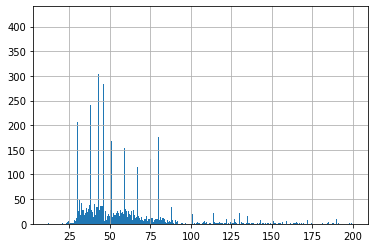

In [359]:
bins1 = df['total_area'].nunique()
df['total_area'].hist(bins=bins1, range = (12, 200))

Гистограмма подтверждает - все пиковые значения находятся в диапазоне от 30 до 70 метров, нормальное распределение.
Соответственно здесь наибольшая конкуренция за покупателя и в бой будут вступать прочие метрики.

Рассмотрим число комнат, rooms.

In [360]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Топ это квартиры с одной, двумя и тремя комнатами.
Построим гистограмму.

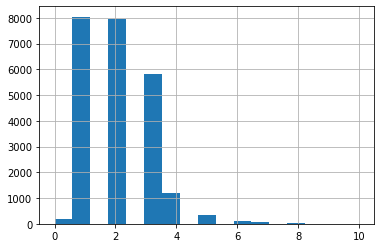

In [361]:
bins2 = df['rooms'].nunique()
df['rooms'].hist(bins=bins2, range = (0, 10))

Абсолютное большинство предложений это 1, 2 и 3 комнатные квартиры. 

Рассмотрим высоту потолков.

In [362]:
df['ceiling_height'].value_counts()

2.70     7838
2.50     4161
2.60     2125
2.55     1613
2.75     1215
         ... 
4.80        1
10.30       1
27.50       1
22.60       1
4.30        1
Name: ceiling_height, Length: 193, dtype: int64

Построим гистограмму.

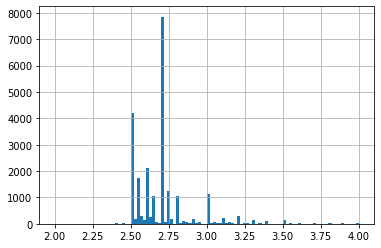

In [363]:
df['ceiling_height'].hist(bins=100, range = (2, 4))

2,40-2,80 плюс 3 метра - самые частые предложения на рынке.

Рассмотрим стоимость квартир.

In [364]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Не очень удачное отображение стоимости для анализа. Дешевле миллиона минимальное количство квартир(225), поэтому
cоздадим новый столбец, где разделим на миллион все значения.

In [365]:
df['last_price_kk'] = df['last_price']/1000000
df['last_price_kk'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_kk, dtype: float64

Половина всех объявлений находится в диапазоне от 3,4 до 6,8 миллиона.

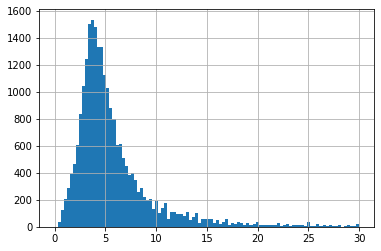

In [366]:
df['last_price_kk'].hist(bins=100, range = (0, 30))

Гистограмма подтверждает, что от 0 до 10 миллионов находится огромное количество объявлений. 
Распределение нормальное

Рассмотрим время продажи квартир. Не забываем, что ноль в графе days_exposition означает, что квартира
еще в продаже.

In [367]:
df.query('days_exposition > 0')['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

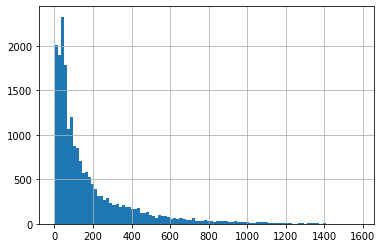

In [368]:
df.query('days_exposition > 0')['days_exposition'].hist(bins=100)

Среднее время продажи - 180 дней. При этом половина квартир была продана менее чем за 100 дней. 
Медиана продаж - 95 дней.
Гистограмма и метод describe помогают понять, что продажа в первые 45 дней это прекрасный показатель,
а если продажа затянулась более чем на 230 дней - это тревожный звонок, возможно надо пересмотреть стоимость.

Посмотрим на редкие и выбивающиеся значения для исследованных выше параметров. 
Создадим идеальную таблицу ideal_table.
Начнем с общей площади.

In [369]:
df['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

2182 разных значения.
Попробусем убрать разброс в десятых долях - приведем все значения к целочисленным.

In [370]:
df['total_area'] = df['total_area'].astype('int')

Посмотрим на результат.

In [371]:
df['total_area'].value_counts().count()

310

310 значений, намного лучше. 
Построим диаграмму размаха.

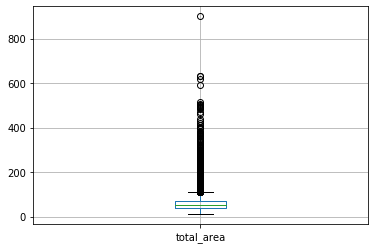

In [372]:
df.boxplot(column='total_area')

Выбросы от 100 с небольшим аж до 1000. Попробуем отсеять ненужное.

In [373]:
Q1_area = df['total_area'].quantile(0.25)
Q3_area = df['total_area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
ideal_table = df.query('(@Q1_area - 1.5 * @IQR_area) <= total_area <= (@Q3_area + 1.5 * @IQR_area)')
len(ideal_table)

22391

22391 квартир после устранения выбросов.

In [374]:
ideal_table['total_area'].value_counts().count()

101

101 различное значение площади. Переходим к следующему столбцу.

Комнаты.

In [375]:
ideal_table['rooms'].value_counts().count()

8

17 - взглянем на размах.

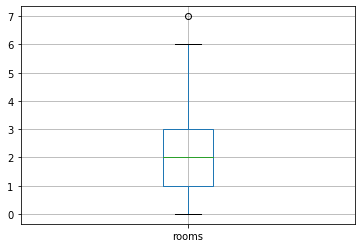

In [376]:
ideal_table.boxplot(column='rooms')

Выше 6 идут выбросы. Отсечем их.

In [377]:
Q1_rooms = ideal_table['rooms'].quantile(0.25)
Q3_rooms = ideal_table['rooms'].quantile(0.75)
IQR_rooms = Q3_rooms - Q1_rooms
ideal_table = ideal_table.query('(@Q1_rooms - 1.5 * @IQR_rooms) <= rooms <= (@Q3_rooms + 1.5 * @IQR_rooms)')
len(ideal_table)

22390

22390 объявлений.

In [378]:
ideal_table['rooms'].value_counts().count()

7

7 значений количества квартир.

Высота потолков

In [379]:
ideal_table['ceiling_height'].value_counts().count()

175

179 разных значений. Взглянем на размах.

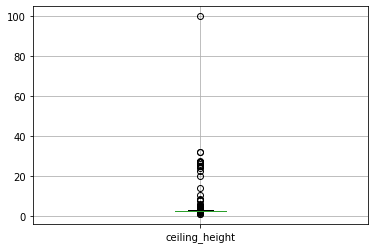

In [380]:
ideal_table.boxplot(column='ceiling_height')

Выбросы даже на отметке в сто. Отсечем их.

In [381]:
Q1_ceiling_height = ideal_table['ceiling_height'].quantile(0.25)
Q3_ceiling_height = ideal_table['ceiling_height'].quantile(0.75)
IQR_ceiling_height = Q3_ceiling_height - Q1_ceiling_height
ideal_table = ideal_table.query('(@Q1_ceiling_height - 1.5 * @IQR_ceiling_height) <= ceiling_height <= (@Q3_ceiling_height + 1.5 * @IQR_ceiling_height)')
len(ideal_table)

20193

20163 объявлений.

In [382]:
ideal_table['ceiling_height'].value_counts().count()

60

62 значения высоты потолков.

Стоимость квартиры.

In [383]:
ideal_table['last_price_kk'].value_counts().count()

2334

2333 разных значений. Взглянем на размах.

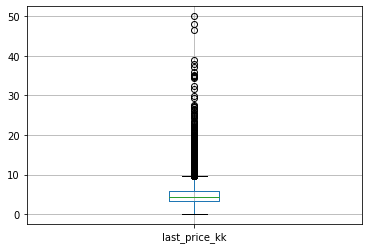

In [384]:
ideal_table.boxplot(column='last_price_kk')

Выбросы выше 10 миллионов. Отсечем их.

In [385]:
Q1_last_price = ideal_table['last_price_kk'].quantile(0.25)
Q3_last_price = ideal_table['last_price_kk'].quantile(0.75)
IQR_last_price = Q3_last_price - Q1_last_price
ideal_table = ideal_table.query('(@Q1_last_price - 1.5 * @IQR_last_price) <= last_price_kk <= (@Q3_last_price + 1.5 * @IQR_last_price)')
len(ideal_table)

19034

19004 объявлений.

In [386]:
ideal_table['last_price'].value_counts().count()

1899

1898 значения стоимости.

Изучим на основе новой таблицы как влияет на стоимость квартиры различные ее параметры.
Начнем с площади.

0.6386355858428424


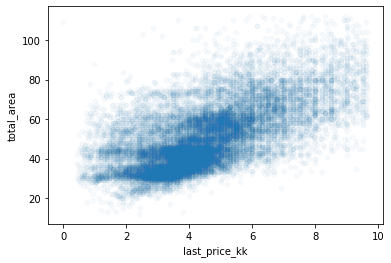

In [387]:
ideal_table.plot(x='last_price_kk', y='total_area', kind='scatter', alpha=0.03)
print(ideal_table['last_price_kk'].corr(ideal_table['total_area']))

0.639. Налицо прямая зависимость стоимости и площади. Не самая сильная, но весомая.

Посмотрим на число комнат.

0.39995452692685857


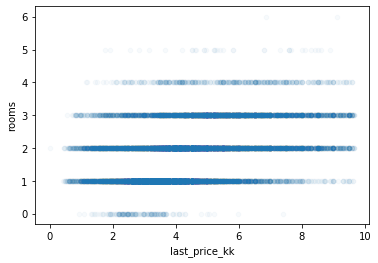

In [388]:
ideal_table.plot(x='last_price_kk', y='rooms', kind='scatter', alpha=0.03)
print(ideal_table['last_price_kk'].corr(ideal_table['rooms']))

0.401. Зависимость прямая, но слабее. Не самый главный показатель.

Удаленность от центра

-0.2905922559120924


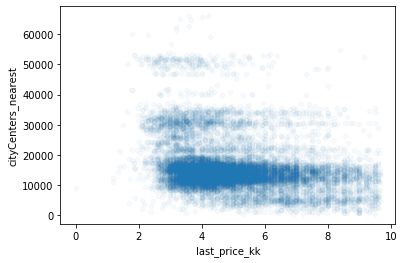

In [389]:
ideal_table.query('cityCenters_nearest != 0').plot(x='last_price_kk', y='cityCenters_nearest', kind='scatter', alpha=0.03)
ideal_cityCenters = ideal_table.query('cityCenters_nearest != 0')
print(ideal_cityCenters['last_price_kk'].corr(ideal_cityCenters['cityCenters_nearest']))

-0.290. Обратная несильная зависимость - чем ближе к центру, тем выше стоимость. 
Но это не главный фактор роста цены.

Этажность.

0.1851453576846301


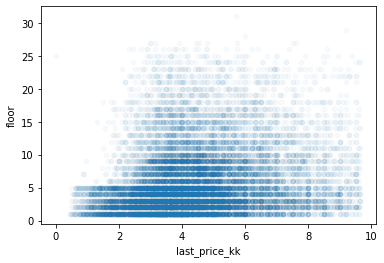

In [390]:
ideal_table.plot(x='last_price_kk', y='floor', kind='scatter', alpha=0.03)
print(ideal_table['last_price_kk'].corr(ideal_table['floor']))

0.184. Прямая слабая зависимость - далеко не главный фактор при покупке.

Тип этажа.
Для этого добавим столбец floor_type_numeric, где присвоим названиям цифры.
Для этого напишем функцию которая это делает.

In [391]:
def floor_num(row):
    floor = row['floor_type']
    if floor == 'первый':
        return 1
    elif floor == 'последний':
        return 10
    else:
        return 5

Применим функцию.

In [392]:
ideal_table['floor_type_numeric'] = ideal_table.apply(floor_num, axis=1)

Проверим.

In [393]:
ideal_table.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,meter_price,weekday_publish,month_publish,year_publish,floor_type,living_split_total,kitchen_split_total,last_price_kk,floor_type_numeric
1,7,3350000,40,2018-12-04,1,2.63,11.0,18.600000,1,False,...,81,82920,1,12,2018,первый,0.460396,0.272277,3.350,1
2,10,5196000,56,2015-08-20,2,2.70,5.0,34.300000,4,False,...,558,92785,3,8,2015,другой,0.612500,0.148214,5.196,5
5,10,2890000,30,2018-09-10,1,2.65,12.0,14.400000,5,False,...,55,95065,0,9,2018,другой,0.473684,0.299342,2.890,5
6,6,3700000,37,2017-11-02,1,2.64,26.0,10.600000,6,False,...,155,99195,3,11,2017,другой,0.284182,0.386059,3.700,5
7,5,7915000,71,2019-04-18,2,2.70,24.0,37.599359,22,False,...,0,110544,3,4,2019,другой,0.525131,0.263966,7.915,5
8,20,2900000,33,2018-05-23,1,2.70,27.0,15.430000,26,False,...,189,87454,2,5,2018,другой,0.465320,0.265682,2.900,5
9,18,5400000,61,2017-02-26,3,2.50,9.0,43.600000,7,False,...,289,88524,6,2,2017,другой,0.714754,0.106557,5.400,5
10,5,5050000,39,2017-11-16,1,2.67,12.0,20.300000,3,False,...,137,127525,3,11,2017,другой,0.512626,0.214646,5.050,5
11,9,3300000,44,2018-08-27,2,2.55,5.0,31.000000,4,False,...,7,75000,0,8,2018,другой,0.704545,0.136364,3.300,5
12,10,3890000,54,2016-06-30,2,2.60,5.0,30.000000,5,False,...,90,72037,3,6,2016,последний,0.555556,0.166667,3.890,10


0.00032235650890104423


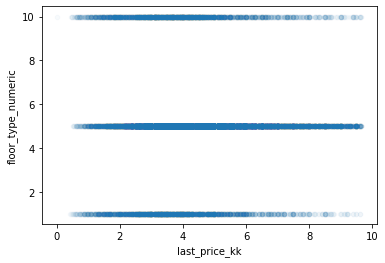

In [394]:
ideal_table.plot(x='last_price_kk', y='floor_type_numeric', kind='scatter', alpha=0.03)
print(ideal_table['last_price_kk'].corr(ideal_table['floor_type_numeric']))

0.0009. Зависимость практически отсутствует.

Зависимость от даты размещения. 
День недели.

-0.009134949711346112


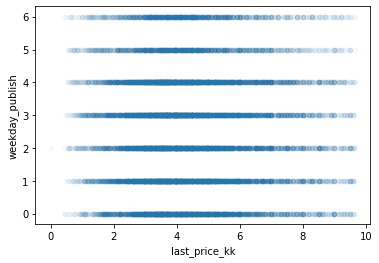

In [395]:
ideal_table.plot(x='last_price_kk', y='weekday_publish', kind='scatter', alpha=0.03)
print(ideal_table['last_price_kk'].corr(ideal_table['weekday_publish']))

-0.008. Крайне слабая отрицательная зависимость, почти что никакая.

Месяц

0.003223963212906191


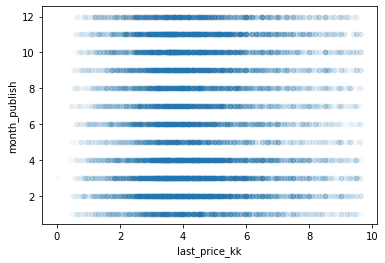

In [396]:
ideal_table.plot(x='last_price_kk', y='month_publish', kind='scatter', alpha=0.03)
print(ideal_table['last_price_kk'].corr(ideal_table['month_publish']))

0.003, чуть сильнее чем день недели, прямая, но опять-таки около ноля.

Год

0.02147099132050469


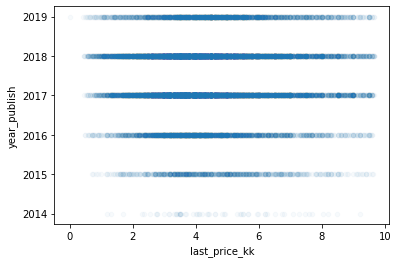

In [397]:
ideal_table.plot(x='last_price_kk', y='year_publish', kind='scatter', alpha=0.03)
print(ideal_table['last_price_kk'].corr(ideal_table['year_publish']))

0.02, самая сильная из всех временных, но все равно нерелевантная.

Посмотрим на населенные пункты с наибольшим числом объявлений.

In [398]:
ideal_table_locality = ideal_table.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc = 'count')
ideal_table_locality = ideal_table_locality.sort_values('meter_price', ascending = False).head(10)
task_locality = ideal_table.query('locality_name in @ideal_table_locality.index')
task_locality.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc = 'mean').sort_values('meter_price', ascending = False)

,meter_price
locality_name,
Санкт-Петербург,103519.132812
Пушкин,99536.406667
Кудрово,94856.880952
Парголово,90331.840491
Мурино,86078.447684
Шушары,78630.815668
Колпино,75319.482650
Гатчина,68374.316901
Всеволожск,66804.703412


103519 рублей за квадратный метр - Петербург возглавялет рейтинг. Сразу за ним - Пушкин, 99536 рублей. 
В низу рейтинга - 57680 рублей - в Выборге разница почти в 2 раза.

Рассмотрим предложения квартир в Санкт-Петербурге и оценим их по удаленности от центра.
Сначала сформируем таблицу.

In [399]:
stp_table = ideal_table.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != 0')
len(stp_table)

11608

11608 предложений.
Теперь приведем значения в столбце cityCenters_nearest к километрам, разделив его на 1000.

In [400]:
stp_table['cityCenters_nearest_km'] = stp_table['cityCenters_nearest']/1000

/Users/antonbogdanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Округлим значения к меньшему.

In [401]:
stp_table['cityCenters_nearest_km'] = stp_table['cityCenters_nearest_km'].apply(np.floor)

/Users/antonbogdanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Составим сводную таблицу.

In [402]:
stp_table_km = stp_table.pivot_table(index = 'cityCenters_nearest_km', values = 'meter_price', aggfunc = 'mean')

Построим график.

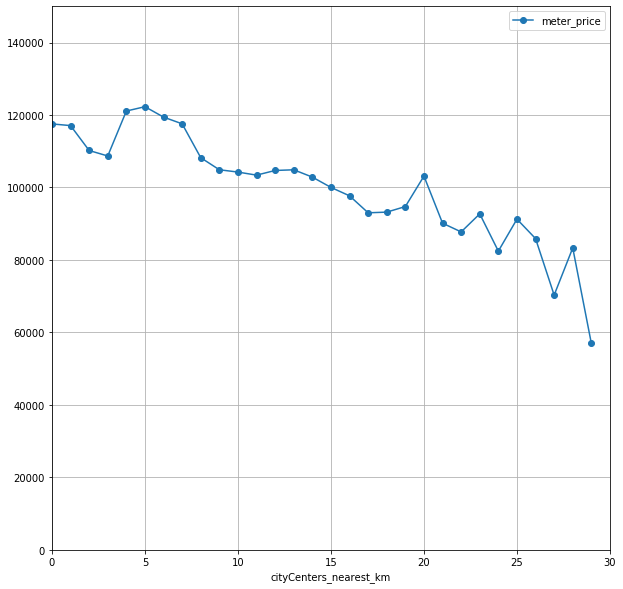

In [403]:
stp_table_km.plot(y='meter_price', style='o-', xlim=(0, 30), ylim=(0, 150000), figsize=(10, 10), grid=True)

Согласно графику получается, что граница центра проходит в радиусе 3 километров. 

Выделяем квартиры в центре.

In [404]:
stp_table_center = stp_table.query('cityCenters_nearest_km < 3')

Проведем анализ.

Первым возьмем столбец общей площади, total_area.

In [405]:
stp_table_center['total_area'].describe()

count    149.000000
mean      64.429530
std       21.465326
min       12.000000
25%       48.000000
50%       64.000000
75%       81.000000
max      112.000000
Name: total_area, dtype: float64

149 объектов, средняя площадь продаваемой квартиры 64,4 метров, половина продаваемых квартир находятся в диапазоне
от 48 до 81 метра, три четверти от 12 до 81 метра.
Построим гистограмму.

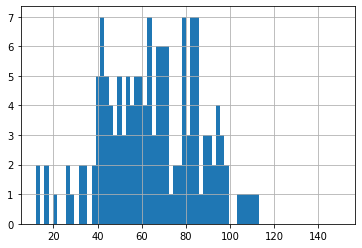

In [406]:
bins1_center = stp_table_center['total_area'].nunique()
stp_table_center['total_area'].hist(bins=bins1_center, range = (12, 150))

Гистограмма подтверждает - все пиковые значения находятся в диапазоне от 40 до 86 метров, нормальное распределение.
Соответственно здесь наибольшая конкуренция за покупателя и в бой будут вступать прочие метрики.

Рассмотрим число комнат, rooms.

In [407]:
stp_table_center['rooms'].value_counts()

2    64
3    45
1    22
4    16
6     1
0     1
Name: rooms, dtype: int64

Топ это квартиры с двумя и тремя комнатами. Причем в отличие в общей аналитики здесь первенствуют 2комнатные
квартиры, за ними 3комнатные, и уже после них однушки.
Построим гистограмму.

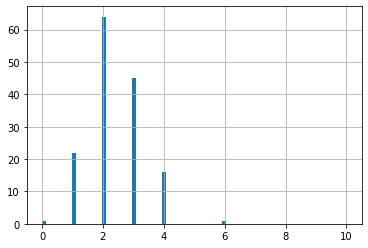

In [408]:
bins2_center = stp_table_center['total_area'].nunique()
stp_table_center['rooms'].hist(bins=bins2_center, range = (0, 10))

Абсолютное большинство предложений это 2 и 3 комнатные квартиры. 1 и 4 комнатные квартиры наравне в районе 20 предложений

Рассмотрим высоту потолков.

In [409]:
stp_table_center['ceiling_height'].value_counts()

2.70    99
2.80    12
2.90     8
2.50     6
2.84     3
2.60     3
2.82     2
2.88     2
2.85     2
2.65     2
2.75     2
2.55     1
2.72     1
2.73     1
2.83     1
2.92     1
2.74     1
2.76     1
2.63     1
Name: ceiling_height, dtype: int64

Построим гистограмму.

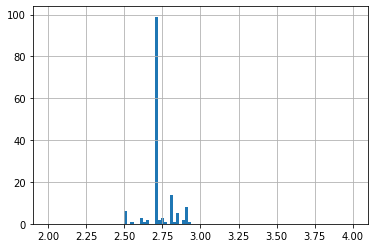

In [410]:
stp_table_center['ceiling_height'].hist(bins=100, range = (2, 4))

Все предложения находятся в пределах от 2,50 до 2,90 метров, абсолютное большинство у значения 2,70.

Рассмотрим стоимость квартир.

In [411]:
stp_table_center['last_price_kk'].describe()

count    149.000000
mean       6.964207
std        1.842344
min        2.100000
25%        5.650000
50%        7.200000
75%        8.500000
max        9.600000
Name: last_price_kk, dtype: float64

Половина всех объявлений находится в диапазоне от 5,6 до 8,5 миллионов. Средняя стоимость 6,9.

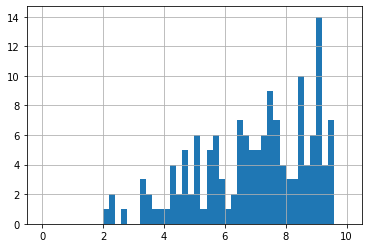

In [412]:
stp_table_center['last_price_kk'].hist(bins=50, range = (0, 10))

Гистограмма подтверждает, что от 3 до 9 миллионов находится большинство объявлений. 
Распределение нормальное

Рассмотрим время продажи квартир. Не забываем, что ноль в графе days_exposition означает, что квартира еще в продаже.

In [413]:
stp_table_center.query('days_exposition > 0')['days_exposition'].describe()

count     134.000000
mean      229.850746
std       255.133476
min         3.000000
25%        56.250000
50%       131.000000
75%       322.250000
max      1477.000000
Name: days_exposition, dtype: float64

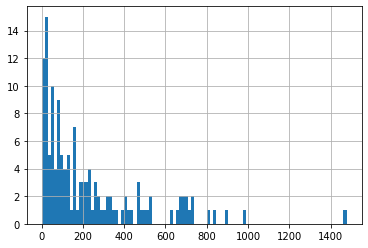

In [414]:
stp_table_center.query('days_exposition > 0')['days_exposition'].hist(bins=100)

Среднее время продажи - 229 дней. При этом половина квартир была продана менее чем за 131 день. 
Гистограмма и метод describe помогают понять, что продажа в первые 56 дней это прекрасный показатель,
а если продажа затянулась более чем на 200 дней - это тревожный звонок, возможно надо пересмотреть стоимость.

Изучим как влияет на стоимость квартиры, расположенной в центре, различные ее параметры.
Начнем с площади.

0.7715430249328373


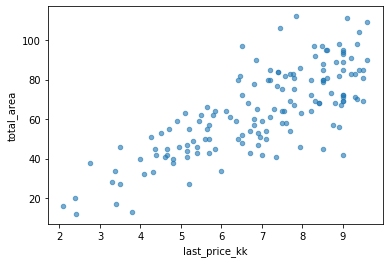

In [415]:
stp_table_center.plot(x='last_price_kk', y='total_area', kind='scatter', alpha=0.6)
print(stp_table_center['last_price_kk'].corr(stp_table_center['total_area']))

0.771. Налицо прямая зависимость стоимости и площади. Очень весомая.

Посмотрим на число комнат.

0.6704945425399702


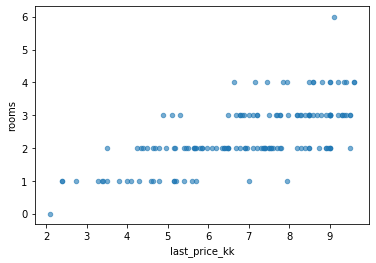

In [416]:
stp_table_center.plot(x='last_price_kk', y='rooms', kind='scatter', alpha=0.6)
print(stp_table_center['last_price_kk'].corr(stp_table_center['rooms']))

0.670. Зависимость прямая, слабее, но также достаточно сильная. Практически главный показатель.

Удаленность от центра

-0.12467869660062181


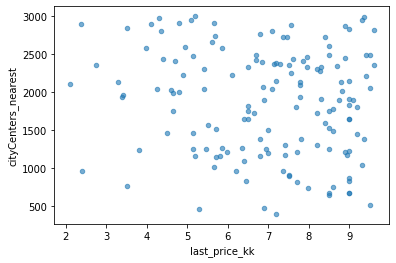

In [417]:
stp_table_center.query('cityCenters_nearest != 0').plot(x='last_price_kk', y='cityCenters_nearest', kind='scatter', alpha=0.6)
ideal_stp_table_center = stp_table_center.query('cityCenters_nearest != 0')
print(ideal_stp_table_center['last_price_kk'].corr(ideal_stp_table_center['cityCenters_nearest']))

-0.124. Обратная несильная зависимость - чем ближе к центру, тем выше стоимость. 
Но это не главный фактор роста цены.

Этажность.

0.16010865324389123


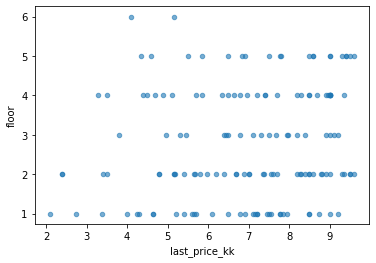

In [418]:
stp_table_center.plot(x='last_price_kk', y='floor', kind='scatter', alpha=0.6)
print(stp_table_center['last_price_kk'].corr(stp_table_center['floor']))

0.160. Прямая слабая зависимость, но важнее удаленности от центра. Далеко не главный фактор при покупке.

Тип этажа.

0.2046054962059179


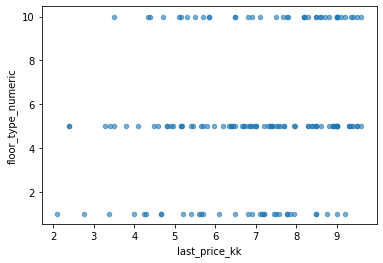

In [419]:
stp_table_center.plot(x='last_price_kk', y='floor_type_numeric', kind='scatter', alpha=0.6)
print(stp_table_center['last_price_kk'].corr(stp_table_center['floor_type_numeric']))

0.204. Прямая зависимость, причем сильнее чем в целом по всей выборке квартир.

Зависимость от даты размещения. 
День недели.

-0.03408460499090574


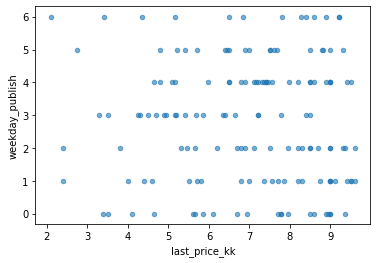

In [420]:
stp_table_center.plot(x='last_price_kk', y='weekday_publish', kind='scatter', alpha=0.6)
print(stp_table_center['last_price_kk'].corr(stp_table_center['weekday_publish']))

-0.034. Крайне слабая отрицательная зависимость, почти что никакая.

Месяц

-0.05878488115187458


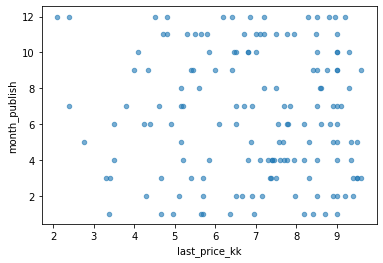

In [421]:
stp_table_center.plot(x='last_price_kk', y='month_publish', kind='scatter', alpha=0.6)
print(stp_table_center['last_price_kk'].corr(stp_table_center['month_publish']))

-0.058, слабо.

Год

0.05293061750392585


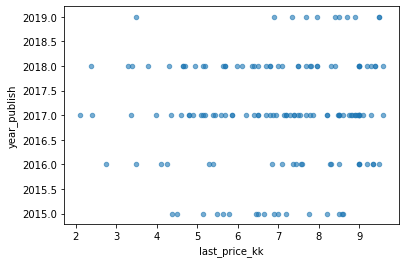

In [422]:
stp_table_center.plot(x='last_price_kk', y='year_publish', kind='scatter', alpha=0.6)
print(stp_table_center['last_price_kk'].corr(stp_table_center['year_publish']))

0.052, не имеющая какого-либо веса.

Рассмотрим квартиры открытой планировки, студии и апартаменты.

Начнем с открытой планировки.

In [423]:
open_space = ideal_table.query('open_plan == True or studio == True or is_apartment == True ')
len(open_space)

211

211 предложений. Проанализируем.

Первым возьмем столбец общей площади, total_area.

In [424]:
open_space['total_area'].describe()

count    211.000000
mean      28.516588
std        9.412426
min       15.000000
25%       24.000000
50%       27.000000
75%       29.000000
max       98.000000
Name: total_area, dtype: float64

211 объектов, средняя площадь 28,5 метров, половина продаваемых объектов находятся в диапазоне от 24 до 29 метров, три четверти от 15 до 29 метров.
Построим гистограмму.

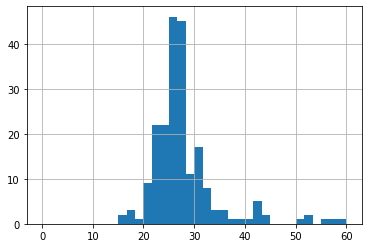

In [425]:
bins1_open = open_space['total_area'].nunique()
open_space['total_area'].hist(bins=bins1_open, range = (0, 60))

Гистограмма подтверждает - все пиковые значения находятся в диапазоне от 22 до 30 метров, нормальное распределение.
Совершенно другие показатели по сравнению с обычными квартирами.

Рассмотрим высоту потолков.

In [426]:
open_space['ceiling_height'].value_counts()

2.70    114
2.75     31
2.80     19
2.60     16
2.64      6
2.50      6
2.65      5
2.56      4
2.63      3
2.76      2
2.90      1
2.55      1
2.77      1
2.74      1
2.68      1
Name: ceiling_height, dtype: int64

Построим гистограмму.

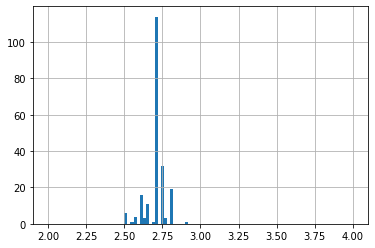

In [427]:
open_space['ceiling_height'].hist(bins=100, range = (2, 4))

Небольшой диапазон от 2,50 до 2,80 метров, абсолютное большинство у значения 2,70.

Рассмотрим стоимость квартир.

In [428]:
open_space['last_price_kk'].describe()

count    211.000000
mean       2.988038
std        1.071577
min        0.945750
25%        2.310000
50%        2.750000
75%        3.474500
max        9.635328
Name: last_price_kk, dtype: float64

Половина всех объявлений находится в диапазоне от 2,3 до 3,4 миллиона. Средняя стоимость 2.98.

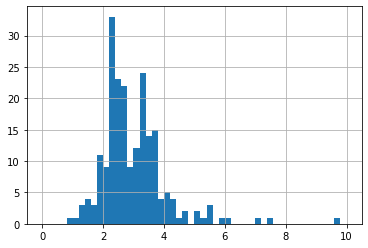

In [429]:
open_space['last_price_kk'].hist(bins=50, range = (0, 10))

Гистограмма подтверждает, что от 2 до 4 миллионов находится большинство объявлений 
с небольшим провалом на 3 миллионах. 
Распределение нормальное

Рассмотрим время продажи квартир. Не забываем, что ноль в графе days_exposition означает, что квартира
еще в продаже.

In [430]:
open_space.query('days_exposition > 0')['days_exposition'].describe()

count    199.000000
mean     114.105528
std      166.982501
min        3.000000
25%       27.000000
50%       46.000000
75%      123.500000
max      931.000000
Name: days_exposition, dtype: float64

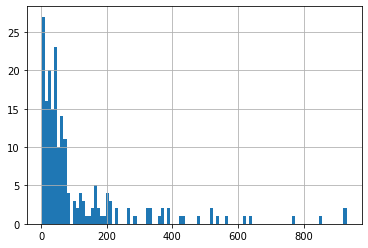

In [431]:
open_space.query('days_exposition > 0')['days_exposition'].hist(bins=100)

Среднее время продажи - 114 дней. При этом половина объектов была продана менее чем за 46 дней. 
Гистограмма и метод describe помогают понять, что продажа в первые 114 дней это прекрасный показатель,
а если продажа затянулась более чем на 123 дня - это тревожный звонок, возможно надо пересмотреть стоимость.

Изучим как влияет на стоимость квартиры, расположенной в центре, различные ее параметры.
Начнем с площади.

0.6682163144462552


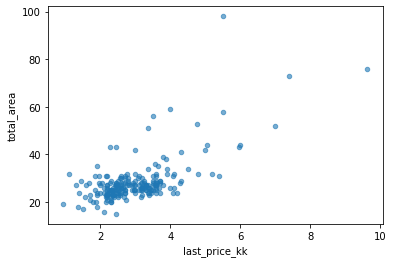

In [432]:
open_space.plot(x='last_price_kk', y='total_area', kind='scatter', alpha=0.6)
print(open_space['last_price_kk'].corr(open_space['total_area']))

0.668. Налицо прямая зависимость стоимости и площади. Очень весомая.

Удаленность от центра

-0.15600871671764682


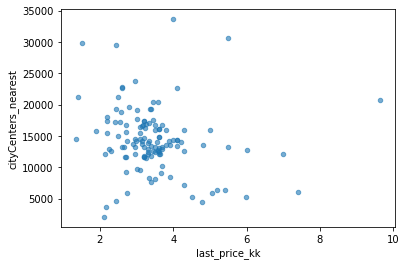

In [433]:
open_space.query('cityCenters_nearest != 0').plot(x='last_price_kk', y='cityCenters_nearest', kind='scatter', alpha=0.6)
ideal_open_space = open_space.query('cityCenters_nearest != 0')
print(ideal_open_space['last_price_kk'].corr(ideal_open_space['cityCenters_nearest']))

-0.156. Обратная несильная зависимость - чем ближе к центру, тем выше стоимость. 
Но это не главный фактор роста цены.

Этажность.

0.07336318318814938


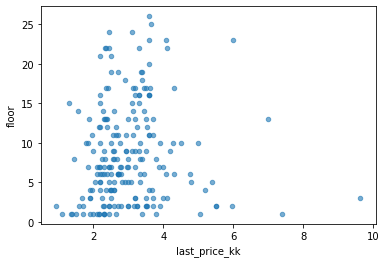

In [434]:
open_space.plot(x='last_price_kk', y='floor', kind='scatter', alpha=0.6)
print(open_space['last_price_kk'].corr(open_space['floor']))

0.073. Прямая слабая зависимость - далеко не главный фактор при покупке.

Тип этажа.

0.15421620071760642


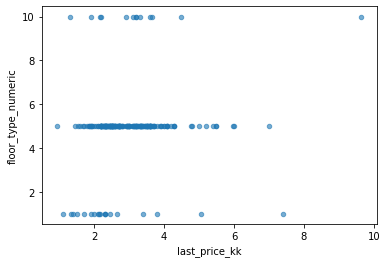

In [435]:
open_space.plot(x='last_price_kk', y='floor_type_numeric', kind='scatter', alpha=0.6)
print(open_space['last_price_kk'].corr(open_space['floor_type_numeric']))

0.154. Прямая зависимость, сильнее чем в целом по этажам, но также не главная.

Зависимость от даты размещения. 
День недели.

-0.046597633555515695


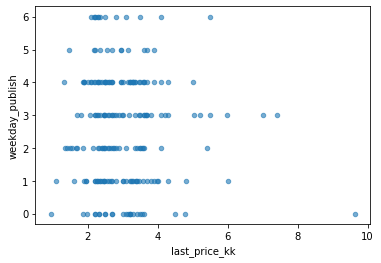

In [436]:
open_space.plot(x='last_price_kk', y='weekday_publish', kind='scatter', alpha=0.6)
print(open_space['last_price_kk'].corr(open_space['weekday_publish']))

-0.046. Крайне слабая отрицательная зависимость, почти что никакая.

Месяц

0.07642176909604308


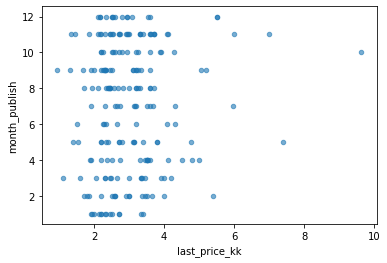

In [437]:
open_space.plot(x='last_price_kk', y='month_publish', kind='scatter', alpha=0.6)
print(open_space['last_price_kk'].corr(open_space['month_publish']))

0.076, чуть-чуть чильнее чем у дней недели.

Год

-0.017171617185984367


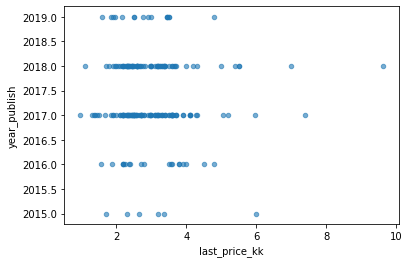

In [438]:
open_space.plot(x='last_price_kk', y='year_publish', kind='scatter', alpha=0.6)
print(open_space['last_price_kk'].corr(open_space['year_publish']))

-0.017, слабая и не имеющая какого-либо веса.

### Шаг 5. Общий вывод

Общий анализ массива данных.

Согласно изученым параметрам площади квартиры, количества комнат, высоты потолков и ее стоимости мы получили следующие оптимальные значения:
- площадь от 40 до 70 метров
- комнатность от 1 до 3, популярность в том же порядке по убыванию.
- высота потолков от 2,40 до 2,80 метра
- стоимость от 3,4 до 6,8 миллиона рублей
Стандартная продолжительность продажи квартиры составляет 95 дней. Быстрая продажа - до 45 дней, затянувшаяся - более 230 дней.

Редкие и выбивающиеся значения содержались в 5500 объявлений - очень большое чилсо для того чтобы влиять на верность анализа. После исключения этих объявлений показатели должны быть намного актуальнее.

Если анализировать весь массив, то главными параметрами для роста стоимости квадратного метра являются площадь квартиры, число комнат и удаленность от центра. Параметры этажа, типа этажа, а также времени публикации объявления являются несущественными для роста цены.

Топ-10 населенных пунктов по стоимости квадратного метра предсказуемо возглавил Санкт-Петербург со средним показателем в 103519 рублей, далее по нисходящей - Пушкин, Кудрово, Парголово, Мурино, Шушары, Колпино, Гатчина, Всеволожск, а замкнул десятку Выборг с почти что двукратным понижением - 57680 рубль.
Проведя анализ средней стоимости квадратного метра по соотношению с удаленностью от центра Санкт-Петербурга мы получили информацию о том что центр города находится в радиусе 4 километров. 

В центре Петербурга получили всего 149 объектов. Изучив их параметры, получили следующую информацию:
- площадь от 48 до 81 метра
- комнатность в топе 2 и 3, но самые популярные это 2, за ними 3, а уже потом 1 и чуть отстает 4.
- высота потолков от 2,50 до 2,90 метров
- стоимость от 5,6 до 8,5 миллионов рублей
Стандартная продолжительность продажи квартиры в центре: сделка в первые 56 дней это прекрасный показатель, а если продажа затянулась более чем на 200 дней - это тревожный звонок, возможно надо пересмотреть стоимость.
Влияние же различных параметров на стоимость квадратного метра здесь сильнее - площадь, число комнат, удаленность от центра и тип этажа имеют больший удельный вес для стоимости, чем в целом по массиву. Однако вес параметров временных, а также просто этажа остался почти таким же незначительным.

Касаемо апартаментов, студий и квартир с открытой планировкой - всего 211 объектов.
- площадь от 24 до 29 метров
- комнатность очевидно здесь не актуальна
- высота потолков от 2,50 до 2,80 метров
- стоимость от 2,3 до 3,4 миллионов рублей
Стандартная продолжительность продажи подобного объекта: сделка в первые 100 дней это прекрасный показатель, а если продажа затянулась более чем на 123 дня - это тревожный звонок.
Влияние же различных параметров на стоимость квадратного метра здесь схожа с целым массивом - главное это площадь, а удаленность от центра и тип этажа имеют незначительный удельный вес для стоимости. Также вес параметров временных и просто этажа остался незначительным.

Если подходить с точки зрения заказчика анализа, то выводы следующие:

1. Необходимо внести фильтры на ввод информации - не оставлять пустые окна значений, к примеру площадь кухни или жилая площадь и проверять их сумму, не превышает ли она общую площадь, и отслеживать экстремальные значения, вроде 5 балконов и 100 этажей. 
2. Для отслеживания мошеннических объявлений можно прибегнуть к аналитике по слишком низкой стоимости квадратного метра - средние показатели по населенным пунктам у нас теперь есть. Также по этому же принципу можно отслеживать ошибочно завышенную стоимость, когда человек не разобрался сколько нулей ему ставить в объявлении.
3. При заполнении информации автоматически - не ограничивать систему по расстоянию до парков, водоемов и аэропорта. Лучше большое расстояние, чем его отсутсвие.
4. Также для более точного подсчета стоимости квадратного метра можно добавить наличие/отстуствие закрытой территории, консъержа, лифта и год постройки дома.



### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод